## Zadanie 1

In [1]:
using Pkg
# Pkg.add("QuadGK")
using QuadGK
using Polynomials
using Plots

In [2]:
ps = []
push!(ps, Polynomial([1]))
push!(ps, Polynomial([0, 1]))

for k in 2:5
    push!(ps, ((2 * k + 1) * ps[k] * Polynomial([0, 1]))/(k+1) - (k * ps[k-1])/(k+1))
end

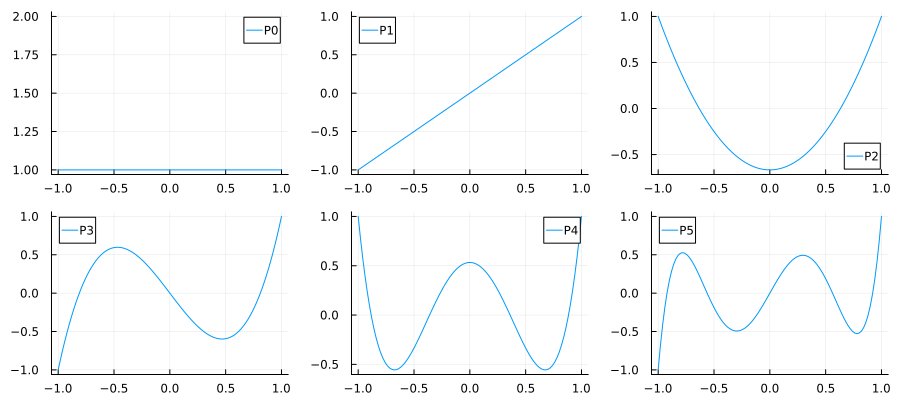

In [3]:
plot(-1, 1, layout=6, size=(900,400))
for (i, poly) in enumerate(ps)
    plot!(poly, -1, 1, subplot=i, label="P$(i-1)")
end
plot!()

In [4]:
for i in 2:4
    (xp1, a) = gauss(Float64, i)
    xp2 = roots(ps[i+1])
    println(xp1)
    println(xp2)
    println()
end

[-0.5773502691896258, 0.5773502691896258]
[-0.6324555320336759, 0.6324555320336758]

[-0.7745966692414834, 0.0, 0.7745966692414834]
[-0.8106434833777775, 0.8106434833777775, 0.0]

[-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]
[-0.8837676634191414, -0.36064640328968045, 0.3606464032896807, 0.8837676634191414]



## Zadanie 2

In [5]:
function g(k, f)
    (xp, a) = gauss(Float64, k)
    sum(a .* f.(xp))
end

g (generic function with 1 method)

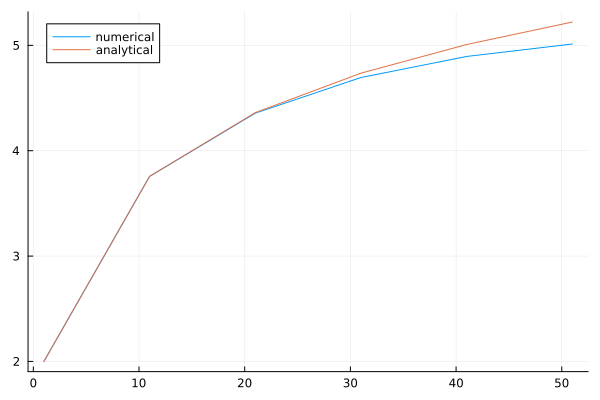

In [6]:
ps = []
p1s = []
for (ind, i) in enumerate(1:10:60)
    p = Polynomial([1 for _ in 1:i])
    p1 = integrate(p)
    push!(ps, g(7, p))
    push!(p1s, p1(1) - p1(-1))
end
plot(1:10:60, ps, label="numerical")
plot!(1:10:60, p1s, label="analytical")

## Zadanie 3

In [7]:
function g1(k, f, a, b)
    f1 = f((b+a)/2 + ((b-a) * Polynomial([0, 1]))/2) * (b-a)/2
    g(k, f1)
end

g1 (generic function with 1 method)

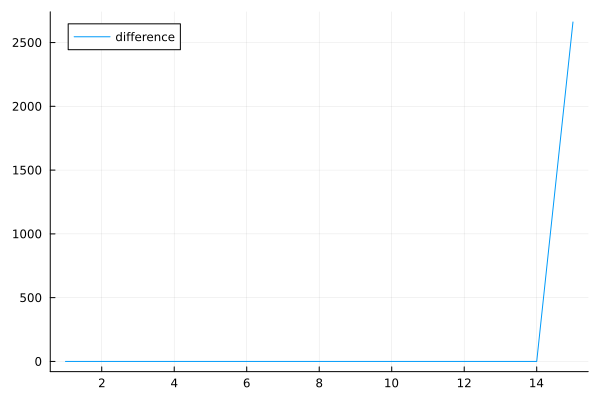

In [8]:
ps = []
p1s = []
diffs = []
for i in 1:15
    p = Polynomial([1 for _ in 1:i])
    p1 = integrate(p)
    push!(ps, g1(7, p, -3, 3))
    push!(p1s, p1(3) - p1(-3))
    push!(diffs, abs(g1(7, p, -3, 3) - (p1(3) - p1(-3))))
end
# plot(1:20, ps, label="numerical")
# plot!(1:20, p1s, label="analytical")
plot(1:15, diffs, label="difference")

## Zadanie 4

In [9]:
nd(x) = (exp((-x^2)/2))/(sqrt(2 * pi))

quadgk(nd, -Inf, Inf)

(1.0000000000032583, 1.4395584997015688e-8)

## Zadanie 5

In [10]:
function rects(f, a, b, n)
    h = (b-a)/n
    sum([f(x + h/2) * h for x in a:h:b-h])
end

rects (generic function with 1 method)

In [14]:
function traps(f, a, b, n)
    h = (b-a)/n
    sum([(f(x) + (f(x+h))) * h / 2 for x in a:h:b-h])
end

traps (generic function with 1 method)

In [25]:
function simps(f, a, b, n)
    h = (b-a)/n
    s = 0
    for x0 in a:h:b-h
        x1 = x0 + h/2
        x2 = x0 + h
        p = fit([x0, x1, x2], [f(x0), f(x1), f(x2)])
        p1 = integrate(p)
        s += p1(x2) - p1(x0)
    end
    s
end

simps (generic function with 1 method)

In [26]:
# p = Polynomial([1, 1, 1])
p(x) = sin(x)
p1(x) = cos(x)
# p1 = integrate(p)
println(p1(10) - p1(0))
println(rects(p, -10, 0, 50))
println(traps(p, -10, 0, 50))
println(simps(p, -10, 0, 50))

-1.8390715290764525
-1.8421402280384467
-1.8329371999244661
-1.8390725520005269


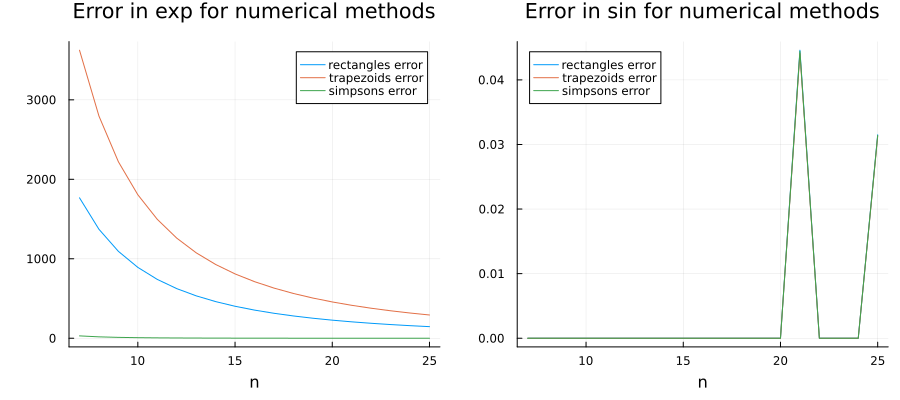

In [44]:
using Plots.PlotMeasures

plot(layout=2, size=(900,400), bottom_margin=5mm, left_margin=5mm, top_margin=5mm)
r = []
t = []
s = []
n_range = 7:25
for n in n_range
    analytical_exp = exp(10) - exp(0)
    push!(r, abs(rects(exp, 0, 10, n) - analytical_exp))
    push!(t, abs(traps(exp, 0, 10, n) - analytical_exp))
    push!(s, abs(simps(exp, 0, 10, n) - analytical_exp))
end
plot!(n_range, r, subplot=1, label="rectangles error", title="Error in exp for numerical methods", xlabel="n")
plot!(n_range, t, subplot=1, label="trapezoids error")
plot!(n_range, s, subplot=1, label="simpsons error")
    
r = []
t = []
s = []
for n in n_range
    analytical_exp = cos(2*pi) - cos(0)
    push!(r, abs(rects(sin, 0, 2*pi, n) - analytical_exp))
    push!(t, abs(traps(sin, 0, 2*pi, n) - analytical_exp))
    push!(s, abs(simps(sin, 0, 2*pi, n) - analytical_exp))
end
plot!(n_range, r, subplot=2, label="rectangles error", title="Error in sin for numerical methods", xlabel="n")
plot!(n_range, t, subplot=2, label="trapezoids error")
plot!(n_range, s, subplot=2, label="simpsons error")